In [1]:
import csv
import pandas as pd

from collections import defaultdict

import spacy
nlp = spacy.load("en_core_web_sm")

import matplotlib.pyplot as plt
from matplotlib import rc, font_manager


In [2]:
# set up plot format: latex fonts

font_files = font_manager.findSystemFonts(fontpaths="/Users/paul/Library/Fonts", fontext="ttf")

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


rc('font',**{'family':'serif','serif':['CMU Serif']})
rc('text', usetex=False)
plt.rcParams.update({'font.size': 12})

In [ ]:
# count nouns in templates

noun_dict = defaultdict(int)

infile = csv.DictReader(open(
	"../../2_final_dataset/prompt_ingredients/templates_full.csv"))

total = 0
for row in infile:
	if row["annot1_template"] != '':
		total += 1
		doc = nlp(row["annot1_template"])
		nouns_in_doc = set()  # Track unique nouns in the current document
        
		for token in doc:
			if token.pos_ == "NOUN":
				nouns_in_doc.add(token.lemma_.lower())  # Add noun to the set
		for noun in nouns_in_doc:
			noun_dict[noun] += 1  # Update count for unique nouns

print("N templates:", total)
print(sorted(noun_dict.items(), key=lambda x: x[1], reverse=True)[:20])


N templates: 3916
[('x', 2367), ('x.', 1175), ('word', 661), ('essay', 447), ('story', 441), ('paragraph', 305), ('article', 302), ('topic', 196), ('style', 188), ('sentence', 136), ('paper', 122), ('text', 121), ('research', 116), ('dialogue', 113), ('idea', 110), ('speech', 105), ('post', 102), ('question', 102), ('point', 88), ('introduction', 88)]


In [ ]:
# count adjectives in templates

adjective_dict = defaultdict(int)

infile = csv.DictReader(open(
	"../../2_final_dataset/prompt_ingredients/templates_full.csv"))

total = 0
for row in infile:
	if row["annot1_template"] != '':
		total += 1
		doc = nlp(row["annot1_template"])
		adjectives_in_doc = set()  # Track unique nouns in the current document
        
		for token in doc:
			if token.pos_ == "ADJ":
				adjectives_in_doc.add(token.lemma_.lower())
		for adj in adjectives_in_doc:
			adjective_dict[adj] += 1

print("N templates:", total)
print(sorted(adjective_dict.items(), key=lambda x: x[1], reverse=True)[:20])

N templates: 3916
[('short', 189), ('detailed', 130), ('long', 117), ('first', 75), ('academic', 69), ('informative', 60), ('clear', 57), ('fictional', 55), ('more', 53), ('polished', 50), ('progressive', 48), ('active', 46), ('coherent', 46), ('varied', 45), ('consistent', 44), ('single', 44), ('authoritative', 44), ('following', 43), ('relevant', 41), ('complex', 37)]


In [5]:
def curate_word_dict(word_dict, exclude_list=[]):

    curated_dict = word_dict.copy()

    for word in exclude_list:
        curated_dict.pop(word, None)
    
    return curated_dict


exclude_noun_list = ['x.', 'x', 'word', 'sentence', 'topic', 'style', 'question', 'point', 'example', 'page']
curated_noun_dict = curate_word_dict(noun_dict, exclude_noun_list)

exclude_adj_list = ['first', 'more', 'single', 'following']
curated_adj_dict = curate_word_dict(adjective_dict, exclude_adj_list)


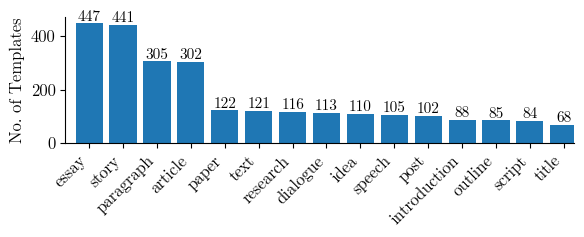

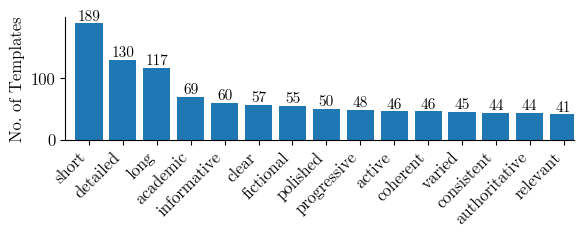

In [ ]:
def plot_barchart(word_dict, save_title, top_n=20):

    plt.figure(figsize=(6, 2.5))

    # Sort the dictionary and get top n items
    sorted_items = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    data = [x[1] for x in sorted_items]
    labels = [x[0] for x in sorted_items]

    # Create bar chart
    bars = plt.bar(range(len(data)), data)

    # set x axis limits
    plt.xlim(-0.7, len(data) - 0.7) 

    # Customize the chart with larger text
    plt.xticks(range(len(data)), labels, rotation=45, ha='right')
    plt.ylabel('No. of Templates')

    # Add value labels on top of each bar with larger font
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # remove plot frame, top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.savefig(f'./figures/{save_title}.png', dpi=900)
    
    plt.show()

plot_barchart(curated_noun_dict, top_n=15, save_title='top_nouns')
plot_barchart(curated_adj_dict, top_n=15, save_title='top_adjectives')